In [1]:
###importing libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob
import pathlib

In [2]:
# path of the main folder
picture_path=pathlib.Path("kaggle_sign\\asl_alphabet_train\\asl_alphabet_train")

In [3]:
picture_path

WindowsPath('kaggle_sign/asl_alphabet_train/asl_alphabet_train')

In [4]:
## Accessing all the files in the folders inside using glob function 
a=list(picture_path.glob('A/*'))
b=list(picture_path.glob('B/*'))
c=list(picture_path.glob('C/*'))
d=list(picture_path.glob('D/*'))
e=list(picture_path.glob('E/*'))
f=list(picture_path.glob('F/*'))
g=list(picture_path.glob('G/*'))
h=list(picture_path.glob('H/*'))
i=list(picture_path.glob('I/*'))
j=list(picture_path.glob('J/*'))
k=list(picture_path.glob('K/*'))
l=list(picture_path.glob('L/*'))
m=list(picture_path.glob('M/*'))
n=list(picture_path.glob('N/*'))
o=list(picture_path.glob('O/*'))
p=list(picture_path.glob('P/*'))
q=list(picture_path.glob('Q/*'))
r=list(picture_path.glob('R/*'))
s=list(picture_path.glob('S/*'))
t=list(picture_path.glob('T/*'))
u=list(picture_path.glob('U/*'))
v=list(picture_path.glob('V/*'))
w=list(picture_path.glob('W/*'))
x=list(picture_path.glob('X/*'))
y=list(picture_path.glob('Y/*'))


In [ ]:
### checking the lengths of the list to see the total number of files

In [ ]:
len(a)

In [ ]:
len(b)

In [5]:
### creating a dictionary with key as the letter and value as the list of pictures of that key

pic_dict={'A':a,'B':b,'C':c,'D':d,'E':e,'F':f,'G':g,'H':h,'I':i,'J':j,'K':k,'L':l,'M':m,'N':n,'O':o,'P':p,'Q':q,'R':r,
          'S':s,'T':t,'U':u,'V':v,'W':w,'X':x,'Y':y}

In [37]:
pic_class={i:v for i,v in enumerate(pic_dict)}

In [38]:
## creating a dictionary of labels with numbers as key and letter as value
pic_class

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

In [14]:
## create two empty list x and y for all the x values and y values

x=[]
y=[]


In [15]:
## filling the x and y list 

for i in pic_dict:
    pic_path_list=pic_dict[i]
    for path in pic_path_list:
        img=cv2.imread(str(path))
        img=cv2.resize(img,(50,50))
        img=img/255
        x.append(img)
        y.append(pic_class[i])
        

In [16]:
len(x)

75000

In [17]:
len(y)

75000

In [18]:
## convert x and y values to numpy array
x=np.array(x)
y=np.array(y)

In [19]:
x.shape

(75000, 50, 50, 3)

In [20]:
y.shape

(75000,)

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [22]:
## train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
# model creation
model=Sequential()
model.add(Conv2D(filters=40,kernel_size=(3,3),input_shape=(50,50,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(25,activation='softmax'))

In [24]:
##model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 40)        1120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 40)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        23104     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [25]:
## compile the model and run the model for 10 epochs and validate the model using x_test and y_test

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x_train,y_train,verbose=1,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1758/1758 [==============================] - 184s 103ms/step - loss: 1.1748 - accuracy: 0.6218 - val_loss: 0.3782 - val_accuracy: 0.8791
Epoch 2/10
1758/1758 [==============================] - 185s 105ms/step - loss: 0.2032 - accuracy: 0.9308 - val_loss: 0.0861 - val_accuracy: 0.9705
Epoch 3/10
1758/1758 [==============================] - 151s 86ms/step - loss: 0.0955 - accuracy: 0.9688 - val_loss: 0.0838 - val_accuracy: 0.9709
Epoch 4/10
1758/1758 [==============================] - 152s 86ms/step - loss: 0.0707 - accuracy: 0.9770 - val_loss: 0.0812 - val_accuracy: 0.9738
Epoch 5/10
1758/1758 [==============================] - 145s 83ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0601 - val_accuracy: 0.9805
Epoch 6/10
1758/1758 [==============================] - 151s 86ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0760 - val_accuracy: 0.9756
Epoch 7/10
1758/1758 [==============================] - 152s 86ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss:

In [26]:
history=hist.history


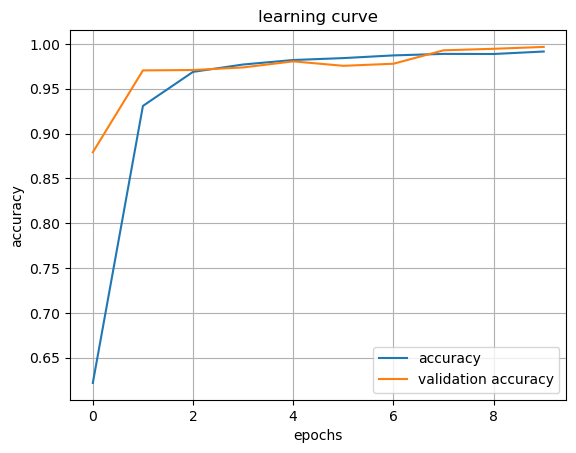

In [27]:
## plotting the learning curve of the model

plt.title('learning curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history['accuracy'],label='accuracy')
plt.plot(history['val_accuracy'],label='validation accuracy')
plt.grid(True)
plt.legend()
plt.style.use('seaborn-paper')
plt.show()


It is seen that the model performs well , the accuracy of model on  both training and validation set increases with number of epochs.Since there is no wide gap between training and validation curve we can say there is no overfitting in the above model

In [1]:
## prediction on the test data

In [28]:
pred=model.predict(x_test)

586/586 [==============================] - 18s 30ms/step


In [29]:
y_test

array([8, 0, 6, ..., 8, 5, 5])

In [30]:
np.argmax(pred[1])

0

In [2]:
## prediction using a random image from another folder called alphabet_test

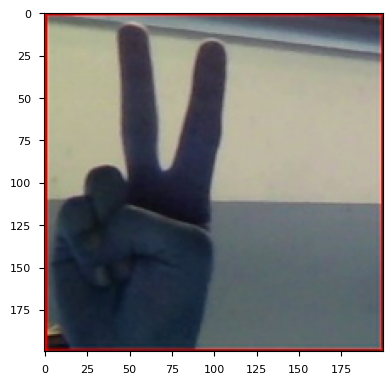

In [31]:
img=cv2.imread("kaggle_sign\\asl_alphabet_test\\asl_alphabet_test\\V_test.jpg")
plt.imshow(img)
img=cv2.resize(img,(50,50))
predimg=img.reshape(1,50,50,3)

In [ ]:
## prediction

In [33]:
pred=model.predict(predimg)

1/1 [==============================] - 0s 17ms/step


In [35]:
index=np.argmax(pred)

In [39]:
pic_class[index]

'V'

In [ ]:
## saving the model as a h5 file

In [43]:
model.save('kaggle_sign_new.h5')

In [3]:
###loading the previous model into variable as k_model

In [ ]:
k_model=tf.keras.models.load_model('kaggle_sign_new.h5')

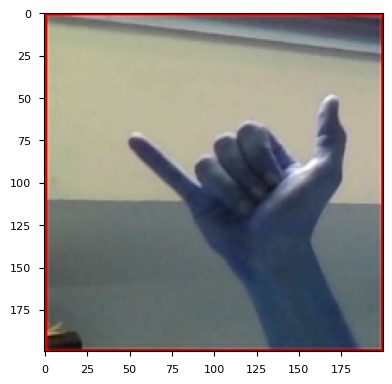

In [40]:
img=cv2.imread("kaggle_sign\\asl_alphabet_test\\asl_alphabet_test\\Y_test.jpg")
plt.imshow(img)
img=cv2.resize(img,(50,50))
predimg=img.reshape(1,50,50,3)






In [ ]:
## prediction using the loaded model

In [41]:
pr=k_model.predict(predimg)

1/1 [==============================] - 0s 33ms/step


In [42]:
pic_class[np.argmax(pr)]

'Y'

# ---------------------------------------------------------------------------------------------------------

In [ ]:
#model=tf.keras.models.load_model('sign_model.h5')

In [ ]:
#im=cv2.imread("kaggle_sign\\asl_alphabet_train\\asl_alphabet_train\\M\\M40.jpg",0)
# plt.imshow(im,cmap='gray')

# im1=cv2.Canny(im,20,50)
# plt.imshow(im1,cmap='gray')